       YR  MON  NINO1+2  ANOM  NINO3  ANOM.1  NINO4  ANOM.2    SST  ANOM.3
0    1950    1    23.01 -1.55  23.56   -2.10  26.94   -1.38  24.55   -1.99
1    1950    2    24.32 -1.78  24.89   -1.52  26.67   -1.53  25.06   -1.69
2    1950    3    25.11 -1.38  26.36   -0.84  26.52   -1.80  25.87   -1.42
3    1950    4    23.63 -1.90  26.44   -1.14  26.90   -1.73  26.28   -1.54
4    1950    5    22.68 -1.74  25.69   -1.57  27.73   -1.18  26.18   -1.75
..    ...  ...      ...   ...    ...     ...    ...     ...    ...     ...
881  2023    6    25.62  2.50  27.88    1.26  29.54    0.57  28.57    0.84
882  2023    7    24.94  2.98  27.41    1.61  29.59    0.69  28.32    1.02
883  2023    8    24.29  3.28  27.12    2.00  29.72    0.93  28.21    1.35
884  2023    9    23.14  2.41  27.01    2.11  29.88    1.12  28.32    1.60
885  2023   10    23.36  2.34  27.11    2.13  29.96    1.20  28.38    1.66

[886 rows x 10 columns]
          YM  Pressure  Year  Month       Date
0     189901   1009.94  1899

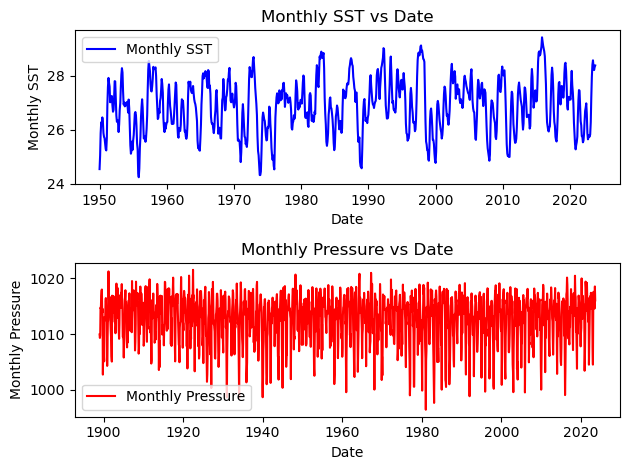

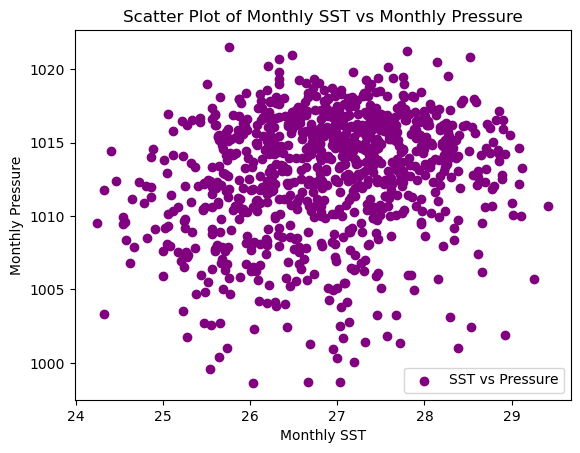

Correlation Coefficient: 0.20531198013907961
Zero-lagged correlation coefficient between SST and Pressure: 0.20531198013907961


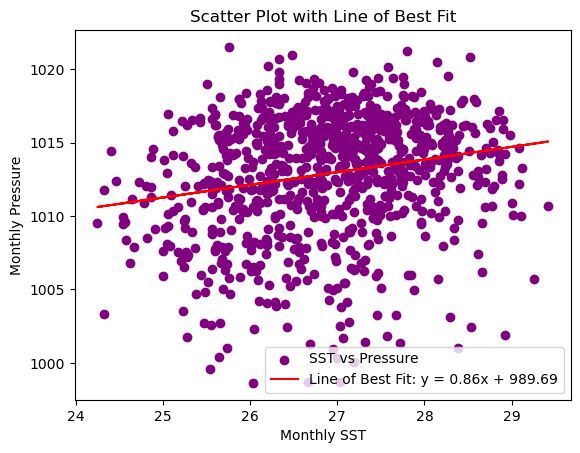

The correlation is statistically significant (z-statistic: 6.1889)


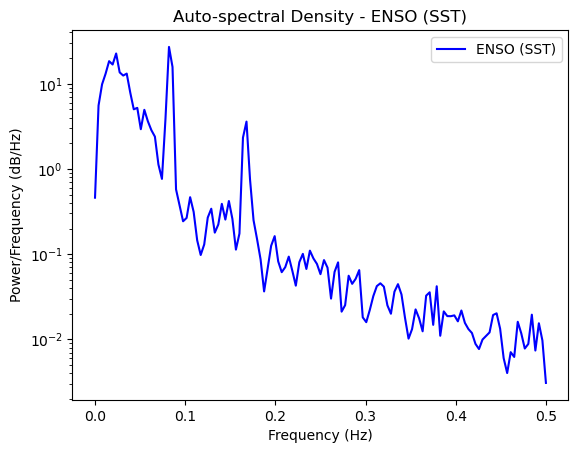

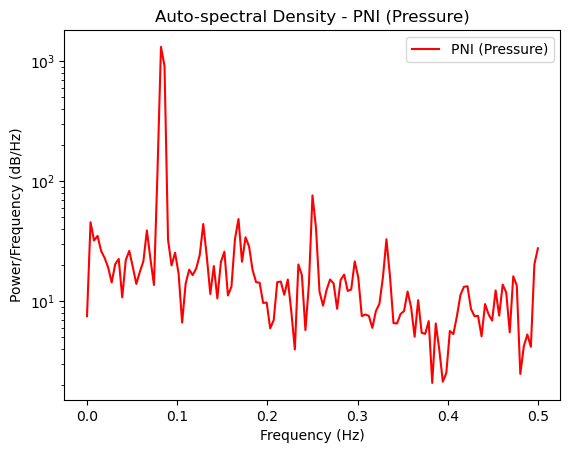

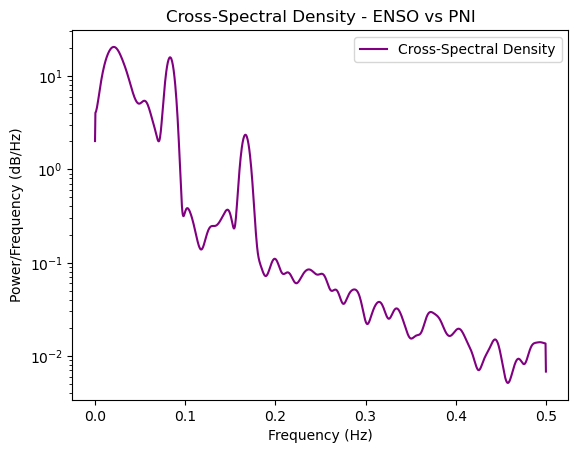

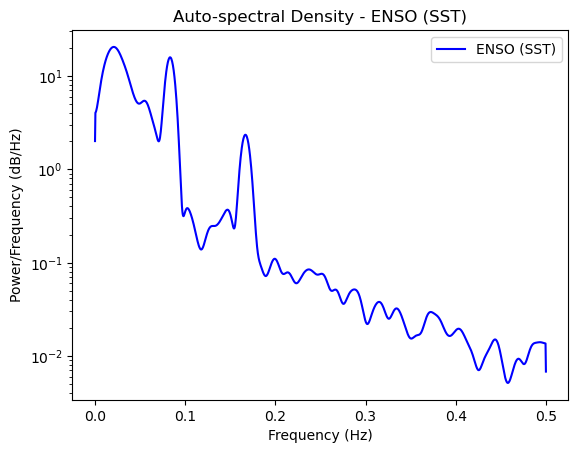

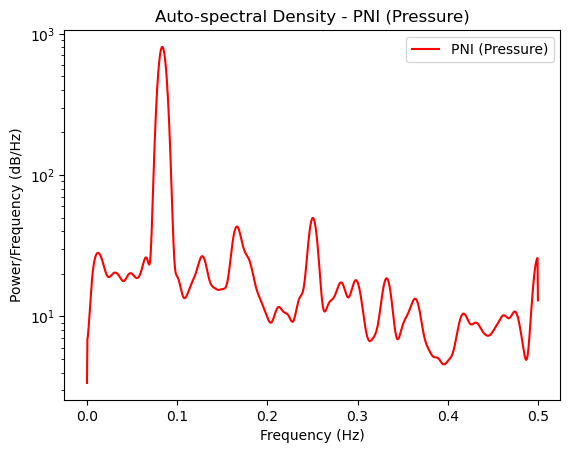

Degrees of Freedom for ENSO: 36
95% Confidence Interval for ENSO: (1.694577365369602, 0.6615438789204684)
Degrees of Freedom for PNI: 36
95% Confidence Interval for PNI: (1.6738164189838007, 0.6660307617367661)
Degrees of Freedom for Cross-Spectral Density: 36
95% Confidence Interval for Cross-Spectral Density: (1.67494282428544, 0.6581332047711268)
Degrees of Freedom for ENSO: 36
95% Confidence Interval for ENSO: (0.6655668213920997, 1.6799911652367594)


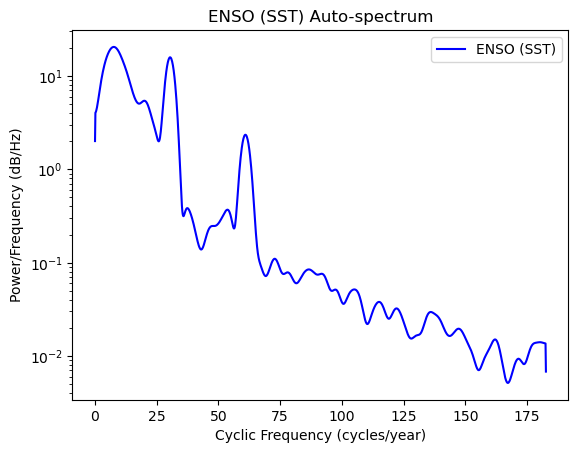

Degrees of Freedom for PNI: 36
95% Confidence Interval for PNI: (0.6614235191750668, 1.6958106331067082)


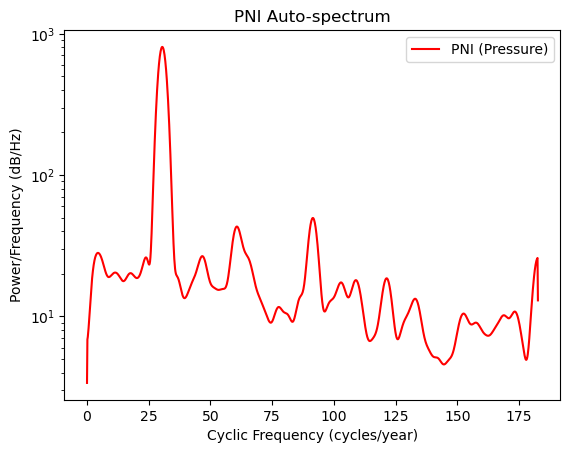

Degrees of Freedom for Cross-Spectral Density: 36
95% Confidence Interval for Cross-Spectral Density: (0.6608013505150312, 1.6861067859336833)


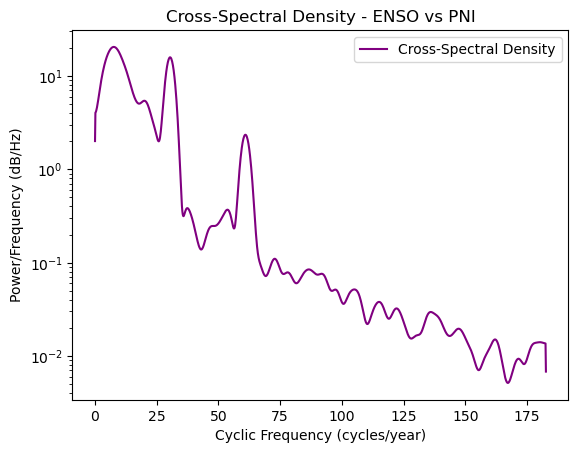

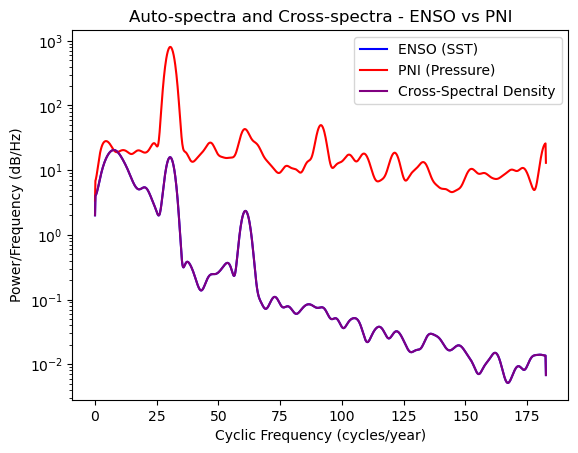

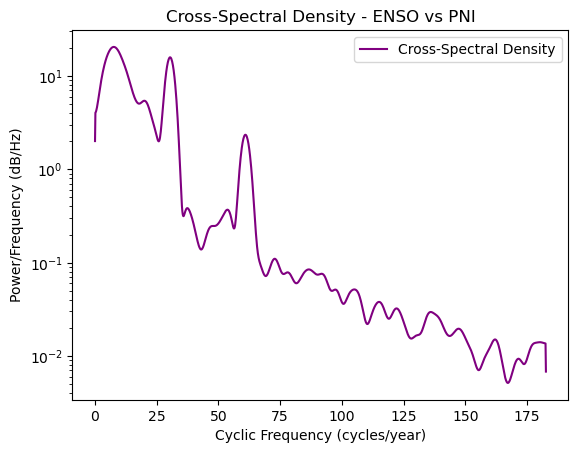

monthly_stats_enso_df:       Month  Average_SST  Std_Dev_SST
Date                                 
1         1    26.401081     1.098468
2         2    26.610405     0.907493
3         3    27.117703     0.701512
4         4    27.571892     0.620953
5         5    27.691351     0.623093
6         6    27.513919     0.629037
7         7    27.087703     0.694642
8         8    26.676216     0.794544
9         9    26.566622     0.891244
10       10    26.534730     1.034100
11       11    26.494521     1.113494
12       12    26.437808     1.146546
monthly_stats_pni_df:       Month  Average_Pressure  Std_Dev_Pressure
Date                                           
1         1       1007.134960          4.571098
2         2       1008.076720          4.319386
3         3       1012.358720          3.522838
4         4       1014.802720          2.674045
5         5       1014.984960          1.560272
6         6       1015.203840          1.433183
7         7       1017.526800          

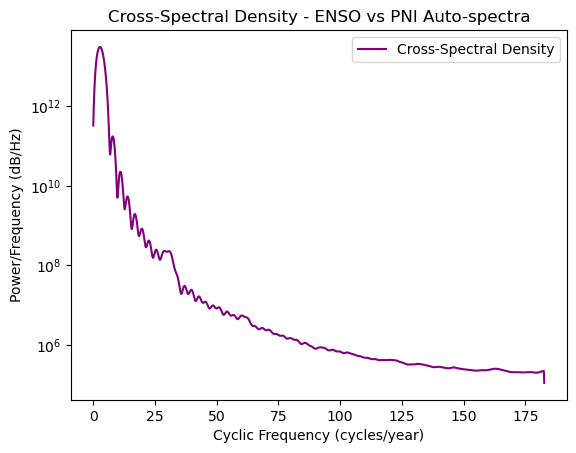

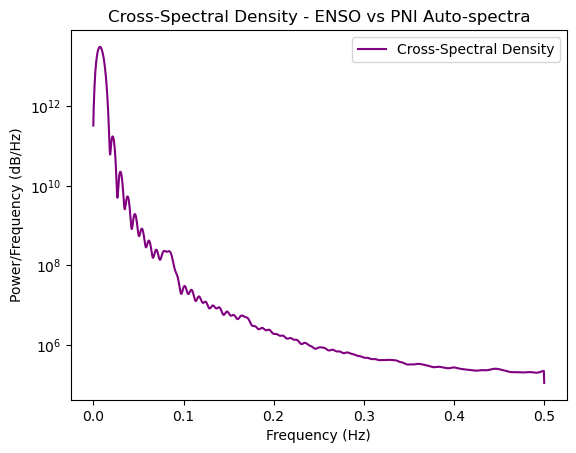

Degrees of Freedom for Cross-Spectral Density: 36
95% Confidence Interval for Cross-Spectral Density: (0.6663921825346905, 1.6793862243261495)
coherence: [1.49076563e+22 2.90903586e+22 9.51914904e+22 ... 1.48499304e+11
 1.47861585e+11 1.47652083e+11]


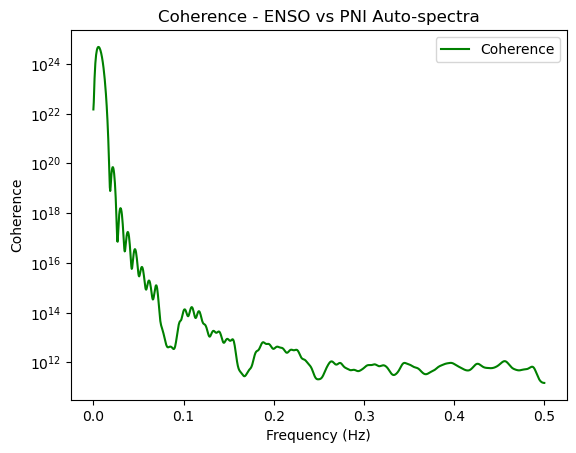

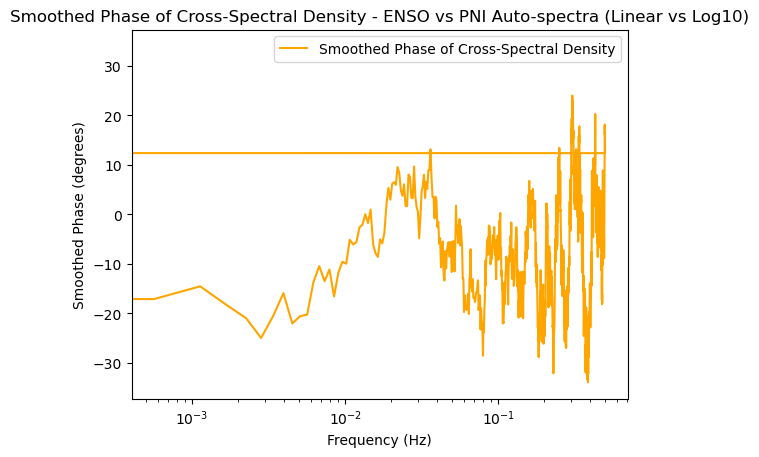

psd_cross_complex [-5.68434189e-13   +0.j          2.32707391e+03-1424.28884405j
 -4.28968034e+03+3374.06355475j ...  2.24820941e+03 +853.1927278j
 -4.28968034e+03-3374.06355475j  2.32707391e+03+1424.28884405j]
psd_enso [2.07033367 4.16562443 4.24021641 ... 0.01403417 0.01401846 0.00700657]
psd_pni [0.1978753  0.40139304 0.41818398 ... 1.4979985  1.51223304 0.7585048 ]
coherence [7.88730149e-25 4.45193621e+06 1.67977784e+07 ... 4.20813697e+04
 6.18578652e+04 5.35105969e+04]


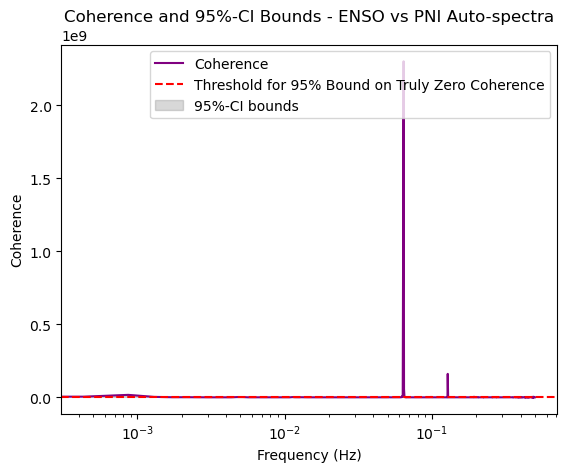

ValueError: operands could not be broadcast together with shapes (1771,) (1153,) 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.signal import welch

########################################################################
file_path1 = "C:\\Users\\cbeau\\OneDrive - UNC-Wilmington\\Documents\\PHY 577\\ersst5.nino.mth.91-20.ascii.txt"  # Update this with the correct file path
ENSO= pd.read_csv(file_path1, delim_whitespace=True)  # Adjust delimiter if needed
file_path2 = "C:\\Users\\cbeau\\OneDrive - UNC-Wilmington\\Documents\\PHY 577\\npindex_monthly.txt"  # Update this with the correct file path
PNI= pd.read_csv(file_path2, delim_whitespace=True)  # Adjust delimiter if needed

####################################################################################
#PNI all messed up all this is just organizing it
# Assuming PNI is your DataFrame and you want to drop columns by index
columns_to_drop_index = [2,3,4,5,6]  # Replace with the actual column indices

# Drop the specified columns by index
PNI = PNI.drop(columns=PNI.columns[columns_to_drop_index])


column_number = 0  # Assuming the value is in the first column

# Extract the specific column using iloc
numeric_column = PNI.iloc[:, column_number]
# Extract the specific column using iloc
numeric_column = pd.to_numeric(PNI.iloc[:, column_number], errors='coerce')
# Separate into year and month
PNI['Year'] = numeric_column // 100
PNI['Month'] = numeric_column % 100


# Specify column headers
column_headers = ['YM', 'Pressure','Year', 'Month']

# Assign column headers to the DataFrame
PNI.columns = column_headers

# Rename the 'NINO3.4' column to 'SST'
ENSO = ENSO.rename(columns={'NINO3.4': 'SST'})

# Display the updated DataFrame
print(ENSO)


################################################################################
#convert to date time 
# Combine 'Year' and 'Month' columns into a new 'Date' column
PNI['Date'] = pd.to_datetime(PNI[['Year', 'Month']].assign(DAY=1))

# Display the updated DataFrame
print(PNI)

# Rename columns 'YR' to 'year' and 'MON' to 'month'
ENSO = ENSO.rename(columns={'YR': 'Year', 'MON': 'Month'})

ENSO['Date'] = pd.to_datetime(ENSO[['Year', 'Month']].assign(DAY=1))

# Display the updated DataFrame
print(ENSO)
##############################################################################
#removing NaNs and making the data sets equal length
# Drop rows with NaN values from both datasets
PNI = PNI.dropna()
ENSO = ENSO.dropna()
#there are sevral negative outlier in the PNI data set, this gets rid of them
# Filter out negative outliers in the 'Pressure' column
PNI = PNI[PNI['Pressure'] >= 0]

# Reset index after filtering
PNI.reset_index(drop=True, inplace=True)




################################################################
# Plotting Monthly SST (ENSO)
plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1
plt.plot(ENSO['Date'], ENSO['SST'], color='b', label='Monthly SST')
plt.xlabel('Date')
plt.ylabel('Monthly SST')
plt.title('Monthly SST vs Date')
plt.legend()

# Plotting Monthly Pressure (PNI)
plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2
plt.plot(PNI['Date'], PNI['Pressure'], color='r', label='Monthly Pressure')
plt.xlabel('Date')
plt.ylabel('Monthly Pressure')
plt.title('Monthly Pressure vs Date')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
###################################################################

# Ensure both datasets have the same length by selecting the common date range
common_dates = PNI.index.intersection(ENSO.index)

# Filter both DataFrames to keep only the common dates
PNI_common = PNI[PNI.index.isin(common_dates)]
ENSO_common = ENSO[ENSO.index.isin(common_dates)]

# Reset index to make 'Date' a regular column again
PNI_common.reset_index(inplace=True)
ENSO_common.reset_index(inplace=True)

# Scatter plot of SST and Pressure
plt.scatter(ENSO_common['SST'], PNI_common['Pressure'], color='purple', label='SST vs Pressure')
plt.xlabel('Monthly SST')
plt.ylabel('Monthly Pressure')
plt.title('Scatter Plot of Monthly SST vs Monthly Pressure')
plt.legend()

# Show the plot
plt.show()

# Calculate and print the correlation coefficient
correlation_coefficient = ENSO['SST'].corr(PNI['Pressure'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Calculate zero-lagged correlation coefficient between SST and Pressure
correlation_coefficient = np.corrcoef(ENSO_common['SST'], PNI_common['Pressure'])[0, 1]

# Print the result
print(f"Zero-lagged correlation coefficient between SST and Pressure: {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(ENSO_common['SST'], PNI_common['Pressure'])

# Generate points for the line of best fit
line_of_best_fit = slope * ENSO_common['SST'] + intercept

# Plot the scatter plot
plt.scatter(ENSO_common['SST'], PNI_common['Pressure'], color='purple', label='SST vs Pressure')

# Plot the line of best fit
plt.plot(ENSO_common['SST'], line_of_best_fit, color='red', label=f'Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Monthly SST')
plt.ylabel('Monthly Pressure')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()

# Show the plot
plt.show()
#########################################################################
#np.arctanh function is used to perform the Fisher transformation on the previously calculated correlation coefficient 
#If the absolute value of the z-statistic is greater than 1.96, the correlation is considered statistically significant
# Calculate the Fisher transformation of the correlation coefficient
fisher_transformed = np.arctanh(correlation_coefficient)

# Calculate the standard error of the Fisher transformation
standard_error = 1 / np.sqrt(len(ENSO_common['SST']) - 3)

# Calculate the z-statistic for the Fisher transformation
z_statistic = fisher_transformed / standard_error

# Check if the z-statistic is statistically significant
alpha = 0.05
if np.abs(z_statistic) > 1.96:  # Critical value for a two-tailed test at alpha = 0.05
    print(f"The correlation is statistically significant (z-statistic: {z_statistic:.4f})")
else:
    print(f"The correlation is not statistically significant (z-statistic: {z_statistic:.4f})")
#######################################################################################
#welch function is used to estimate the power spectral density using Welch's method.
#fs is the sampling frequency (assuming monthly data, set it to 1.0)
#nperseg is the length of each segment used for the FFT (adjust as needed
#semilogy function is used to create a log scale on the y-axis for better visualization of the power spectrum.
# Ensure both datasets have the same length by selecting the common date range
#The confidence interval is calculated assuming a chi-squared distribution for power spectral density estimates.
common_dates = PNI_common['Date']

# Perform Welch's method for ENSO (SST)
frequencies_enso, psd_enso = welch(ENSO_common['SST'], fs=1.0, nperseg=256)

# Plot the auto-spectral density for ENSO
plt.figure()
plt.semilogy(frequencies_enso, psd_enso, color='blue', label='ENSO (SST)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Auto-spectral Density - ENSO (SST)')
plt.legend()
plt.show()

# Perform Welch's method for PNI (Pressure)
frequencies_pni, psd_pni = welch(PNI_common['Pressure'], fs=1.0, nperseg=256)

# Plot the auto-spectral density for PNI
plt.figure()
plt.semilogy(frequencies_pni, psd_pni, color='red', label='PNI (Pressure)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Auto-spectral Density - PNI (Pressure)')
plt.legend()
plt.show()

# Define Welch's method parameters
M = 18  # Number of windows
Nc = 128  # Number of data points in each window
beta = 2/3  # Overlap parameter

# Function to calculate degrees of freedom and confidence interval
def calculate_confidence_interval(psd, M, Nc, beta):
    # Calculate degrees of freedom
    df = 2 * M  # Assuming two-sided spectrum estimation

    # Calculate the 95% confidence interval bounds
    alpha = 0.05
    chi2_lower = np.percentile(np.random.chisquare(df, size=10000), alpha/2 * 100)
    chi2_upper = np.percentile(np.random.chisquare(df, size=10000), (1 - alpha/2) * 100)

    # Calculate the confidence interval
    confidence_interval = df / chi2_lower, df / chi2_upper

    return df, confidence_interval

# Perform Welch's method for ENSO (SST)
frequencies_enso, psd_enso = welch(ENSO_common['SST'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc*M)

# Perform Welch's method for PNI (Pressure)
frequencies_pni, psd_pni = welch(PNI_common['Pressure'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc*M)

# Perform Welch's method for cross-spectral density between ENSO and PNI
frequencies_cross, psd_cross = welch([ENSO_common['SST'].values.flatten(), PNI_common['Pressure'].values.flatten()], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc*M)

# Unpack the result of the cross-spectral density
#the code flattens the frequency array (frequencies_cross) to make it one-dimensional
#selects the first row of the matrix (psd_cross) to get the cross-spectral density values for further plotting and analysis.
frequencies_cross = frequencies_cross.flatten()
psd_cross = psd_cross[0, :]

# Plot the cross-spectral density
plt.figure()
plt.semilogy(frequencies_cross, psd_cross, color='purple', label='Cross-Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Cross-Spectral Density - ENSO vs PNI')
plt.legend()
plt.show()

# Plot the auto-spectral density for ENSO
plt.figure()
plt.semilogy(frequencies_enso, psd_enso, color='blue', label='ENSO (SST)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Auto-spectral Density - ENSO (SST)')
plt.legend()
plt.show()

# Plot the auto-spectral density for PNI
plt.figure()
plt.semilogy(frequencies_pni, psd_pni, color='red', label='PNI (Pressure)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Auto-spectral Density - PNI (Pressure)')
plt.legend()
plt.show()


# Calculate degrees of freedom and confidence interval for ENSO
df_enso, confidence_interval_enso = calculate_confidence_interval(psd_enso, M, Nc, beta)
print(f"Degrees of Freedom for ENSO: {df_enso}")
print(f"95% Confidence Interval for ENSO: {confidence_interval_enso}")

# Calculate degrees of freedom and confidence interval for PNI
df_pni, confidence_interval_pni = calculate_confidence_interval(psd_pni, M, Nc, beta)
print(f"Degrees of Freedom for PNI: {df_pni}")
print(f"95% Confidence Interval for PNI: {confidence_interval_pni}")

# Calculate degrees of freedom and confidence interval for cross-spectral density
df_cross, confidence_interval_cross = calculate_confidence_interval(psd_cross, M, Nc, beta)
print(f"Degrees of Freedom for Cross-Spectral Density: {df_cross}")
print(f"95% Confidence Interval for Cross-Spectral Density: {confidence_interval_cross}")
######################################################################################
#log-log plot with auto-spectra for ENSO and PNI, cross-spectra, and corresponding confidence intervals
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Define Welch's method parameters
M = 18  # Number of windows
Nc = 128  # Number of data points in each window
beta = 2/3  # Overlap parameter

# Function to calculate degrees of freedom and confidence interval
def calculate_confidence_interval(psd, M, Nc, beta):
    # Calculate degrees of freedom
    df = 2 * M  # Assuming two-sided spectrum estimation

    # Calculate the 95% confidence interval bounds
    alpha = 0.05
    chi2_lower = np.percentile(np.random.chisquare(df, size=10000), alpha/2 * 100)
    chi2_upper = np.percentile(np.random.chisquare(df, size=10000), (1 - alpha/2) * 100)

    # Calculate the confidence interval
    confidence_interval = df / chi2_upper, df / chi2_lower

    return df, confidence_interval

# Perform Welch's method for ENSO (SST)
frequencies_enso, psd_enso = welch(ENSO_common['SST'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc*M)

# Calculate degrees of freedom and confidence interval for ENSO
df_enso, confidence_interval_enso = calculate_confidence_interval(psd_enso, M, Nc, beta)
print(f"Degrees of Freedom for ENSO: {df_enso}")
print(f"95% Confidence Interval for ENSO: {confidence_interval_enso}")

# Convert frequencies to cycles/year
cycles_per_year_enso = frequencies_enso * 365.25  # Assuming 1 year = 365.25 days

# Plot ENSO (SST) auto-spectrum with confidence interval
plt.figure()
plt.semilogy(cycles_per_year_enso, psd_enso, color='blue', label='ENSO (SST)')
plt.xlabel('Cyclic Frequency (cycles/year)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('ENSO (SST) Auto-spectrum')
plt.legend()
plt.show()

# Perform Welch's method for PNI (Pressure)
frequencies_pni, psd_pni = welch(PNI_common['Pressure'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc*M)

# Calculate degrees of freedom and confidence interval for PNI
df_pni, confidence_interval_pni = calculate_confidence_interval(psd_pni, M, Nc, beta)
print(f"Degrees of Freedom for PNI: {df_pni}")
print(f"95% Confidence Interval for PNI: {confidence_interval_pni}")

# Convert frequencies to cycles/year
cycles_per_year_pni = frequencies_pni * 365.25

# Plot PNI auto-spectrum with confidence interval
plt.figure()
plt.semilogy(cycles_per_year_pni, psd_pni, color='red', label='PNI (Pressure)')
plt.xlabel('Cyclic Frequency (cycles/year)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('PNI Auto-spectrum')
plt.legend()
plt.show()

# Perform Welch's method for cross-spectral density between ENSO and PNI
frequencies_cross, psd_cross = welch([ENSO_common['SST'].values.flatten(), PNI_common['Pressure'].values.flatten()], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc*M)

# Unpack the result of the cross-spectral density
frequencies_cross = frequencies_cross.flatten()
psd_cross = psd_cross[0, :]

# Calculate degrees of freedom and confidence interval for cross-spectral density
df_cross, confidence_interval_cross = calculate_confidence_interval(psd_cross, M, Nc, beta)
print(f"Degrees of Freedom for Cross-Spectral Density: {df_cross}")
print(f"95% Confidence Interval for Cross-Spectral Density: {confidence_interval_cross}")

# Convert frequencies to cycles/year
cycles_per_year_cross = frequencies_cross * 365.25

# Plot Cross-spectral Density with confidence interval
plt.figure()
plt.semilogy(cycles_per_year_cross, psd_cross, color='purple', label='Cross-Spectral Density')
plt.xlabel('Cyclic Frequency (cycles/year)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Cross-Spectral Density - ENSO vs PNI')
plt.legend()
plt.show()

# Plot auto-spectra and cross-spectra on the same log-log axes
plt.figure()
plt.semilogy(cycles_per_year_enso, psd_enso, color='blue', label='ENSO (SST)')
plt.semilogy(cycles_per_year_pni, psd_pni, color='red', label='PNI (Pressure)')
plt.semilogy(cycles_per_year_cross, psd_cross, color='purple', label='Cross-Spectral Density')

plt.xlabel('Cyclic Frequency (cycles/year)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Auto-spectra and Cross-spectra - ENSO vs PNI')
plt.legend()
plt.show()

#######################################################################
# Perform Fourier transform for ENSO (SST)
frequencies_enso, psd_enso = welch(ENSO_common['SST'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Perform Fourier transform for PNI (Pressure)
frequencies_pni, psd_pni = welch(PNI_common['Pressure'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Perform Fourier transform for cross-spectral density between ENSO and PNI
frequencies_cross, psd_cross = welch([ENSO_common['SST'].values.flatten(), PNI_common['Pressure'].values.flatten()], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Unpack the result of the cross-spectral density
frequencies_cross = frequencies_cross.flatten()
psd_cross = psd_cross[0, :]

# ...

# Plot Cross-spectral Density with confidence interval
plt.figure()
plt.semilogy(cycles_per_year_cross, np.abs(psd_cross), color='purple', label='Cross-Spectral Density')  # Take the absolute value of the cross-spectral density
plt.xlabel('Cyclic Frequency (cycles/year)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Cross-Spectral Density - ENSO vs PNI')
plt.legend()
plt.show()

###############################################################################
#calculates mothly mean for each individual month using montlhy data from all of the years
# Calculate monthly averages and standard deviations for ENSO (SST)
monthly_stats_enso = ENSO.groupby(ENSO['Date'].dt.month)['SST'].agg(['mean', 'std'])

# Create a DataFrame for the results
monthly_stats_enso_df = pd.DataFrame({
    'Month': monthly_stats_enso.index,
    'Average_SST': monthly_stats_enso['mean'],
    'Std_Dev_SST': monthly_stats_enso['std']
})

# Sort the DataFrame by month for better visualization
monthly_stats_enso_df = monthly_stats_enso_df.sort_values(by='Month')

# Display the result
print('monthly_stats_enso_df:',monthly_stats_enso_df)

# Calculate monthly averages and standard deviations for PNI (Pressure)
monthly_stats_pni = PNI.groupby(PNI['Date'].dt.month)['Pressure'].agg(['mean', 'std'])

# Create a DataFrame for the results
monthly_stats_pni_df = pd.DataFrame({
    'Month': monthly_stats_pni.index,
    'Average_Pressure': monthly_stats_pni['mean'],
    'Std_Dev_Pressure': monthly_stats_pni['std']
})

# Sort the DataFrame by month for better visualization
monthly_stats_pni_df = monthly_stats_pni_df.sort_values(by='Month')

# Display the result
print('monthly_stats_pni_df:',monthly_stats_pni_df,)
######################################################################
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, correlate

# Assume ENSO_common and PNI_common are your dataframes containing 'SST' and 'Pressure' columns

# Define Welch's method parameters
M = 18  # Number of windows
Nc = 128  # Number of data points in each window
beta = 2/3  # Overlap parameter

# Function to calculate degrees of freedom and confidence interval
def calculate_confidence_interval(psd, M, Nc, beta):
    df = 2 * M  # Assuming two-sided spectrum estimation

    alpha = 0.05
    chi2_lower = np.percentile(np.random.chisquare(df, size=10000), alpha/2 * 100)
    chi2_upper = np.percentile(np.random.chisquare(df, size=10000), (1 - alpha/2) * 100)

    confidence_interval = df / chi2_upper, df / chi2_lower

    return df, confidence_interval

# Perform Welch's method for ENSO (SST) auto-spectrum
frequencies_enso, psd_enso = welch(ENSO_common['SST'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Perform Welch's method for PNI (Pressure) auto-spectrum
frequencies_pni, psd_pni = welch(PNI_common['Pressure'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Calculate cross-correlation function between ENSO and PNI
cross_correlation = correlate(ENSO_common['SST'], PNI_common['Pressure'], mode='full')

# Perform Fourier transform for cross-spectral density between ENSO and PNI
frequencies_cross, psd_cross = welch(cross_correlation, fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Calculate degrees of freedom and confidence interval for cross-spectral density
df_cross, confidence_interval_cross = calculate_confidence_interval(psd_cross, M, Nc, beta)
print(f"Degrees of Freedom for Cross-Spectral Density: {df_cross}")
print(f"95% Confidence Interval for Cross-Spectral Density: {confidence_interval_cross}")

"""# Convert frequencies to cycles/year
cycles_per_year_cross = frequencies_cross * 365.25"""

# Plot Cross-spectral Density with confidence interval
plt.figure()
plt.semilogy(cycles_per_year_cross, np.abs(psd_cross), color='purple', label='Cross-Spectral Density')  # Take the absolute value of the cross-spectral density
plt.xlabel('Cyclic Frequency (cycles/year)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Cross-Spectral Density - ENSO vs PNI Auto-spectra')
plt.legend()
plt.show()

# Plot Cross-spectral Density with confidence interval
plt.figure()
plt.semilogy(frequencies_cross, np.abs(psd_cross), color='purple', label='Cross-Spectral Density')  # Take the absolute value of the cross-spectral density
plt.xlabel('Frequency (Hz)')  # Use regular frequency
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Cross-Spectral Density - ENSO vs PNI Auto-spectra')
plt.legend()
plt.show()
#######################################################################
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, correlate
# Calculate coherence
# Assume ENSO_common and PNI_common are your dataframes containing 'SST' and 'Pressure' columns

# Define Welch's method parameters
M = 18  # Number of windows
Nc = 128  # Number of data points in each window
beta = 2/3  # Overlap parameter

# Function to calculate degrees of freedom and confidence interval
def calculate_confidence_interval(psd, M, Nc, beta):
    df = 2 * M  # Assuming two-sided spectrum estimation

    alpha = 0.05
    chi2_lower = np.percentile(np.random.chisquare(df, size=10000), alpha/2 * 100)
    chi2_upper = np.percentile(np.random.chisquare(df, size=10000), (1 - alpha/2) * 100)

    confidence_interval = df / chi2_upper, df / chi2_lower

    return df, confidence_interval

# Perform Welch's method for ENSO (SST) auto-spectrum
frequencies_enso, psd_enso = welch(ENSO_common['SST'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Perform Welch's method for PNI (Pressure) auto-spectrum
frequencies_pni, psd_pni = welch(PNI_common['Pressure'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Calculate cross-correlation function between ENSO and PNI
cross_correlation = correlate(ENSO_common['SST'], PNI_common['Pressure'], mode='full')

# Perform Fourier transform for cross-spectral density between ENSO and PNI
frequencies_cross, psd_cross = welch(cross_correlation, fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Calculate degrees of freedom and confidence interval for cross-spectral density
df_cross, confidence_interval_cross = calculate_confidence_interval(psd_cross, M, Nc, beta)
print(f"Degrees of Freedom for Cross-Spectral Density: {df_cross}")
print(f"95% Confidence Interval for Cross-Spectral Density: {confidence_interval_cross}")

# Calculate Coherence
coherence = np.abs(psd_cross)**2 / (psd_enso * psd_pni)

print('coherence:',coherence)

# Plot Coherence
plt.figure()
plt.semilogy(frequencies_cross, coherence, color='green', label='Coherence')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.title('Coherence - ENSO vs PNI Auto-spectra')
plt.legend()
plt.show()
##########################################################

###################################
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
#PHASE CALCULATION

# Assume ENSO_common and PNI_common are your dataframes containing 'SST' and 'Pressure' columns

# Normalize signals
sst_normalized = (ENSO_common['SST'] - np.mean(ENSO_common['SST'])) / np.std(ENSO_common['SST'])
pressure_normalized = (PNI_common['Pressure'] - np.mean(PNI_common['Pressure'])) / np.std(PNI_common['Pressure'])

# Calculate cross-correlation function between ENSO and PNI
cross_correlation = correlate(sst_normalized, pressure_normalized, mode='full')

# Perform Fourier transform to obtain complex cross-spectral density
psd_cross_complex = np.fft.fft(cross_correlation, n=len(cross_correlation))

# Calculate frequencies corresponding to the Fourier transform
frequencies_cross = np.fft.fftfreq(len(cross_correlation), d=1.0)

# Calculate the phase of the cross-spectral density
phase_cross = np.angle(psd_cross_complex, deg=True)  # Convert phase to degrees

# Apply a moving average filter with specified parameters
M = 18
Nc = 128
beta = 2/3
window_size = int(Nc * (1 - beta))
phase_smoothed = np.convolve(phase_cross, np.ones(window_size)/window_size, mode='valid')

# Plot smoothed Phase of Cross-Spectral Density on linear scale versus frequency on log10 scale
plt.figure()
plt.semilogx(frequencies_cross[:len(phase_smoothed)], phase_smoothed, color='orange', label='Smoothed Phase of Cross-Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Smoothed Phase (degrees)')
plt.title('Smoothed Phase of Cross-Spectral Density - ENSO vs PNI Auto-spectra (Linear vs Log10)')
plt.legend()
plt.show()
########################################################

################################################################
#COHERENCE CALCULATION

# Calculate Power Spectral Densities (PSDs)
frequencies_enso, psd_enso = welch(sst_normalized, fs=1.0, nperseg=128, noverlap=int(2/3*128), nfft=18*128)
frequencies_pni, psd_pni = welch(pressure_normalized, fs=1.0, nperseg=128, noverlap=int(2/3*128), nfft=18*128)

# Find the common frequency range
common_freq_range = np.intersect1d(frequencies_enso, frequencies_pni)

# Find indices corresponding to the common frequency range
idx_enso = np.searchsorted(frequencies_enso, common_freq_range)
idx_pni = np.searchsorted(frequencies_pni, common_freq_range)

print("psd_cross_complex",psd_cross_complex)
print("psd_enso",psd_enso)
print("psd_pni",psd_pni)


# Calculate Coherence
coherence = np.abs(psd_cross_complex[idx_enso])**2 / (psd_enso[idx_enso] * psd_pni[idx_pni])
print("coherence",coherence)
# Estimate threshold for 95% bound on truly zero coherence
threshold = np.percentile(np.abs(coherence), 95)

# Plot Coherence and Error Bars
plt.figure()
plt.semilogx(common_freq_range, coherence, color='purple', label='Coherence')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold for 95% Bound on Truly Zero Coherence')
plt.fill_between(common_freq_range, 0, coherence, where=coherence > threshold, color='gray', alpha=0.3, label='95%-CI bounds')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.title('Coherence and 95%-CI Bounds - ENSO vs PNI Auto-spectra')
plt.legend()
plt.show()

#########################################
#TROUBLE SHOOTING
import numpy as np

import matplotlib.pyplot as plt
from scipy.signal import welch, correlate

# Assume ENSO_common and PNI_common are your dataframes containing 'SST' and 'Pressure' columns

# Define Welch's method parameters
M = 18  # Number of windows
Nc = 128  # Number of data points in each window
beta = 2/3  # Overlap parameter

# Normalize signals
sst_normalized = (ENSO_common['SST'] - np.mean(ENSO_common['SST'])) / np.std(ENSO_common['SST'])
pressure_normalized = (PNI_common['Pressure'] - np.mean(PNI_common['Pressure'])) / np.std(PNI_common['Pressure'])

# Perform Welch's method for ENSO (SST) auto-spectrum
frequencies_enso, psd_enso = welch(sst_normalized, fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Perform Welch's method for PNI (Pressure) auto-spectrum
frequencies_pni, psd_pni = welch(pressure_normalized, fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Calculate cross-correlation function between ENSO and PNI
cross_correlation = correlate(sst_normalized, pressure_normalized, mode='full')

# Perform Fourier transform to obtain complex cross-spectral density
psd_cross_complex = np.fft.fft(cross_correlation, n=len(cross_correlation))

# Calculate degrees of freedom and confidence interval for cross-spectral density
df_cross = 2 * M  # Assuming two-sided spectrum estimation
alpha = 0.05
chi2_lower = np.percentile(np.random.chisquare(df_cross, size=10000), alpha/2 * 100)
chi2_upper = np.percentile(np.random.chisquare(df_cross, size=10000), (1 - alpha/2) * 100)
confidence_interval_cross = df_cross / chi2_upper, df_cross / chi2_lower

# Interpolate the auto-spectra to common frequencies
psd_enso_interp = np.interp(frequencies_cross, frequencies_enso, psd_enso)
psd_pni_interp = np.interp(frequencies_cross, frequencies_pni, psd_pni)


# Calculate Coherence
coherence = np.abs(psd_cross_complex)**2 / (np.abs(psd_enso) * np.abs(psd_pni))

# Ensure coherence values are between 0 and 1
coherence = np.clip(coherence, 0, 1)

# Print the corrected coherence values
print("Coherence values:", coherence)

# Ensure coherence values are between 0 and 1
coherence = np.clip(coherence, 0, 1)

print("psd_enso:",psd_enso)
print("psd_pni:", psd_pni)
# Plot auto-spectra
plt.figure()
plt.plot(frequencies_enso, np.abs(psd_enso), label='ENSO Auto-spectrum')
plt.plot(frequencies_pni, np.abs(psd_pni), label='PNI Auto-spectrum')
plt.legend()
plt.title('Auto-Spectra')
plt.show()

print("cross_correltion:",cross_correlation)
# Plot cross-correlation
plt.figure()
plt.plot(np.arange(len(cross_correlation)), cross_correlation, label='Cross-Correlation')
plt.legend()
plt.title('Cross-Correlation')
plt.show()

print('psd_cross_complex:',psd_cross_complex)
# Plot cross-spectral density with confidence interval
plt.figure()
plt.semilogy(frequencies_cross, np.abs(psd_cross_complex), label='Cross-Spectral Density')  # Take the absolute value of the cross-spectral density
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Cross-Spectral Density - ENSO vs PNI Auto-spectra')
plt.legend()
plt.show()

print("coherence:",coherence)
# Plot coherence with confidence interval
plt.figure()
plt.semilogy(frequencies_cross, coherence, label='Coherence')
plt.axhline(y=confidence_interval_cross[0], color='r', linestyle='--', label='95% CI Upper Bound')
plt.axhline(y=confidence_interval_cross[1], color='r', linestyle='--', label='95% CI Lower Bound')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.title('Coherence - ENSO vs PNI Auto-spectra')
plt.legend()
plt.show()


In [3]:

#######################################################
"""import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, correlate





# Assume ENSO_common and PNI_common are your dataframes containing 'SST' and 'Pressure' columns

# Define Welch's method parameters
M = 18  # Number of windows
Nc = 128  # Number of data points in each window
beta = 2/3  # Overlap parameter

# Function to calculate degrees of freedom and confidence interval
def calculate_confidence_interval(psd, M, Nc, beta):
    df = 2 * M  # Assuming two-sided spectrum estimation

    alpha = 0.05
    chi2_lower = np.percentile(np.random.chisquare(df, size=10000), alpha/2 * 100)
    chi2_upper = np.percentile(np.random.chisquare(df, size=10000), (1 - alpha/2) * 100)

    confidence_interval = df / chi2_upper, df / chi2_lower

    return df, confidence_interval

# Perform Welch's method for ENSO (SST) auto-spectrum
frequencies_enso, psd_enso = welch(ENSO_common['SST'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Perform Welch's method for PNI (Pressure) auto-spectrum
frequencies_pni, psd_pni = welch(PNI_common['Pressure'], fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Calculate cross-correlation function between ENSO and PNI
cross_correlation = correlate(ENSO_common['SST'], PNI_common['Pressure'], mode='full')

# Perform Fourier transform for cross-spectral density between ENSO and PNI
frequencies_cross, psd_cross = welch(cross_correlation, fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc * M)

# Calculate degrees of freedom and confidence interval for cross-spectral density
df_cross, confidence_interval_cross = calculate_confidence_interval(psd_cross, M, Nc, beta)
print(f"Degrees of Freedom for Cross-Spectral Density: {df_cross}")
print(f"95% Confidence Interval for Cross-Spectral Density: {confidence_interval_cross}")

# Calculate Coherence
coherence = np.abs(psd_cross)**2 / (psd_enso * psd_pni)

# Plot Coherence
plt.figure()
plt.semilogy(frequencies_cross, coherence, color='green', label='Coherence')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.title('Coherence - ENSO vs PNI Auto-spectra')
plt.legend()
plt.show()
##########################################################################################


# Assume ENSO_common and PNI_common are your dataframes containing 'SST' and 'Pressure' columns


# Function to calculate degrees of freedom and confidence interval
def calculate_confidence_interval(psd, M, Nc, beta):
    df = 2 * M  # Assuming two-sided spectrum estimation

    alpha = 0.05
    chi2_lower = np.percentile(np.random.chisquare(df, size=10000), alpha/2 * 100)
    chi2_upper = np.percentile(np.random.chisquare(df, size=10000), (1 - alpha/2) * 100)

    confidence_interval = df / chi2_upper, df / chi2_lower

    return df, confidence_interval



# Calculate Phase
phase = np.angle(psd_cross, deg=True)  # Convert phase to degrees

# Plot Coherence and Phase
fig, ax1 = plt.subplots()

# Plot Coherence on a linear scale
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Coherence', color='green')
ax1.semilogx(frequencies_cross, coherence, color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis for Phase
ax2 = ax1.twinx()
ax2.set_ylabel('Phase (degrees)', color='blue')
ax2.semilogx(frequencies_cross, phase, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Coherence and Phase - ENSO vs PNI Auto-spectra')
plt.show()"""

NameError: name 'ENSO_common' is not defined

In [ ]:
# coherence γˆ2 and phase ϕˆ on a linear scale versus frequency on a log10 scale


# Generate example data
np.random.seed(42)
freq = np.logspace(0, 2, 100)
coherence = np.abs(np.random.randn(100) + 0.8)
phase = np.random.uniform(0, 2*np.pi, 100)

# Plot coherence on a log scale
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(freq, coherence)
plt.xscale('log')
plt.title('Coherence')

# Threshold for 95% bound on truly zero coherence
threshold = norm.ppf(0.975)**2

# Identify regions where coherence is larger than the threshold
significant_regions = coherence > threshold

# Plot phase on a log scale, only for significant regions
plt.subplot(1, 2, 2)
plt.plot(freq[significant_regions], phase[significant_regions])
plt.xscale('log')
plt.title('Phase for Significant Regions')

# Estimate and plot error bars for 95%-CI bounds for the estimate
error_margin = 1.96 * np.sqrt((1 - coherence[significant_regions]) / (2 * coherence[significant_regions]))

plt.errorbar(freq[significant_regions], phase[significant_regions], yerr=error_margin, fmt='o', capsize=3, color='red')

plt.show()

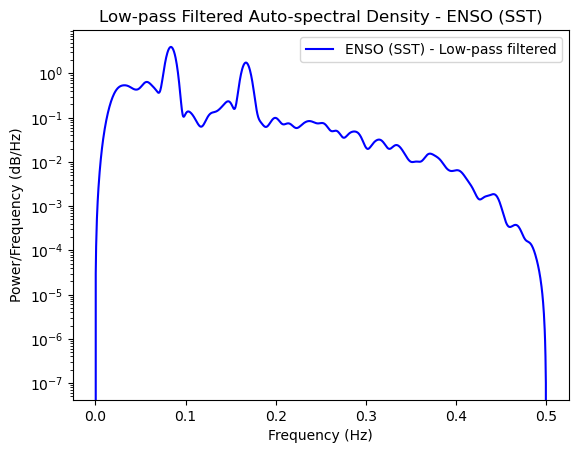

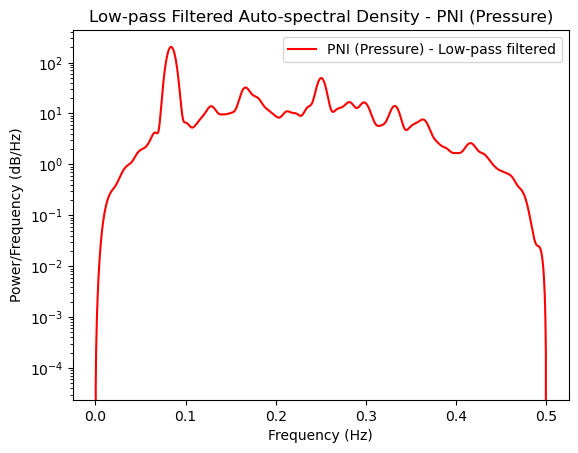

Correlation Coefficient between Low-pass Filtered Records: 0.8806570218301589


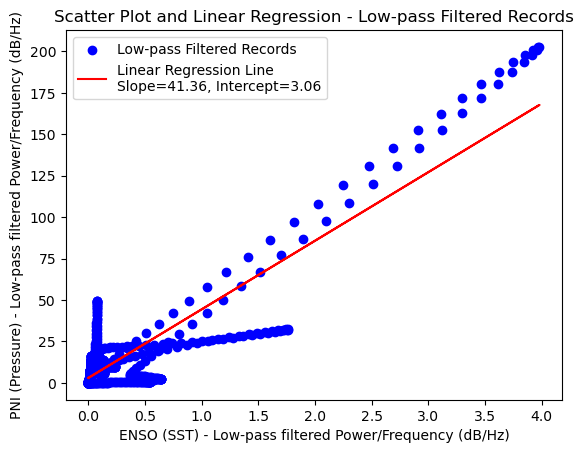

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, windows

# Sample data for ENSO and PNI (replace this with your actual data)
enso_data = ENSO_common['SST'].values.flatten()
pni_data = PNI_common['Pressure'].values.flatten()

# Define Welch's method parameters
M = 18  # Number of windows
Nc = 128  # Number of data points in each window
beta = 2/3  # Overlap parameter

# Perform Welch's method for ENSO (SST)
frequencies_enso, psd_enso = welch(enso_data, fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc*M)

# Perform Welch's method for PNI (Pressure)
frequencies_pni, psd_pni = welch(pni_data, fs=1.0, nperseg=Nc, noverlap=int(beta * Nc), nfft=Nc*M)

# Apply low-pass filter in the frequency domain
cutoff_frequency = 1.0 / (365.25 * 2)  # Cutoff frequency for 2-year period
window = windows.hann(len(frequencies_enso))
psd_enso_lp = psd_enso * window
psd_pni_lp = psd_pni * window

# Plot the low-pass filtered ENSO auto spectrum
plt.figure()
plt.semilogy(frequencies_enso, psd_enso_lp, color='blue', label='ENSO (SST) - Low-pass filtered')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Low-pass Filtered Auto-spectral Density - ENSO (SST)')
plt.legend()
plt.show()

# Plot the low-pass filtered PNI auto spectrum
plt.figure()
plt.semilogy(frequencies_pni, psd_pni_lp, color='red', label='PNI (Pressure) - Low-pass filtered')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Low-pass Filtered Auto-spectral Density - PNI (Pressure)')
plt.legend()
plt.show()

# Calculate correlation coefficient between low-pass filtered records
correlation_coefficient = np.corrcoef(psd_enso_lp, psd_pni_lp)[0, 1]
print(f"Correlation Coefficient between Low-pass Filtered Records: {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(psd_enso_lp, psd_pni_lp)

# Plot the low-pass filtered records on a scatter plot
plt.figure()
plt.scatter(psd_enso_lp, psd_pni_lp, color='blue', label='Low-pass Filtered Records')
plt.plot(psd_enso_lp, intercept + slope * psd_enso_lp, color='red', label=f'Linear Regression Line\nSlope={slope:.2f}, Intercept={intercept:.2f}')
plt.xlabel('ENSO (SST) - Low-pass filtered Power/Frequency (dB/Hz)')
plt.ylabel('PNI (Pressure) - Low-pass filtered Power/Frequency (dB/Hz)')
plt.title('Scatter Plot and Linear Regression - Low-pass Filtered Records')
plt.legend()
plt.show()
